<a href="https://colab.research.google.com/github/afraniofilho/6Sigma/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [5]:
df = pd.read_csv('/content/imports-85.csv')

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df_novo = df[['make', 'wheel-base', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

In [8]:
df_novo.head()

,make,wheel-base,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,alfa-romero,88.6,2548,130,111,21,27
1,alfa-romero,88.6,2548,130,111,21,27
2,alfa-romero,94.5,2823,152,154,19,26
3,audi,99.8,2337,109,102,24,30
4,audi,99.4,2824,136,115,18,22


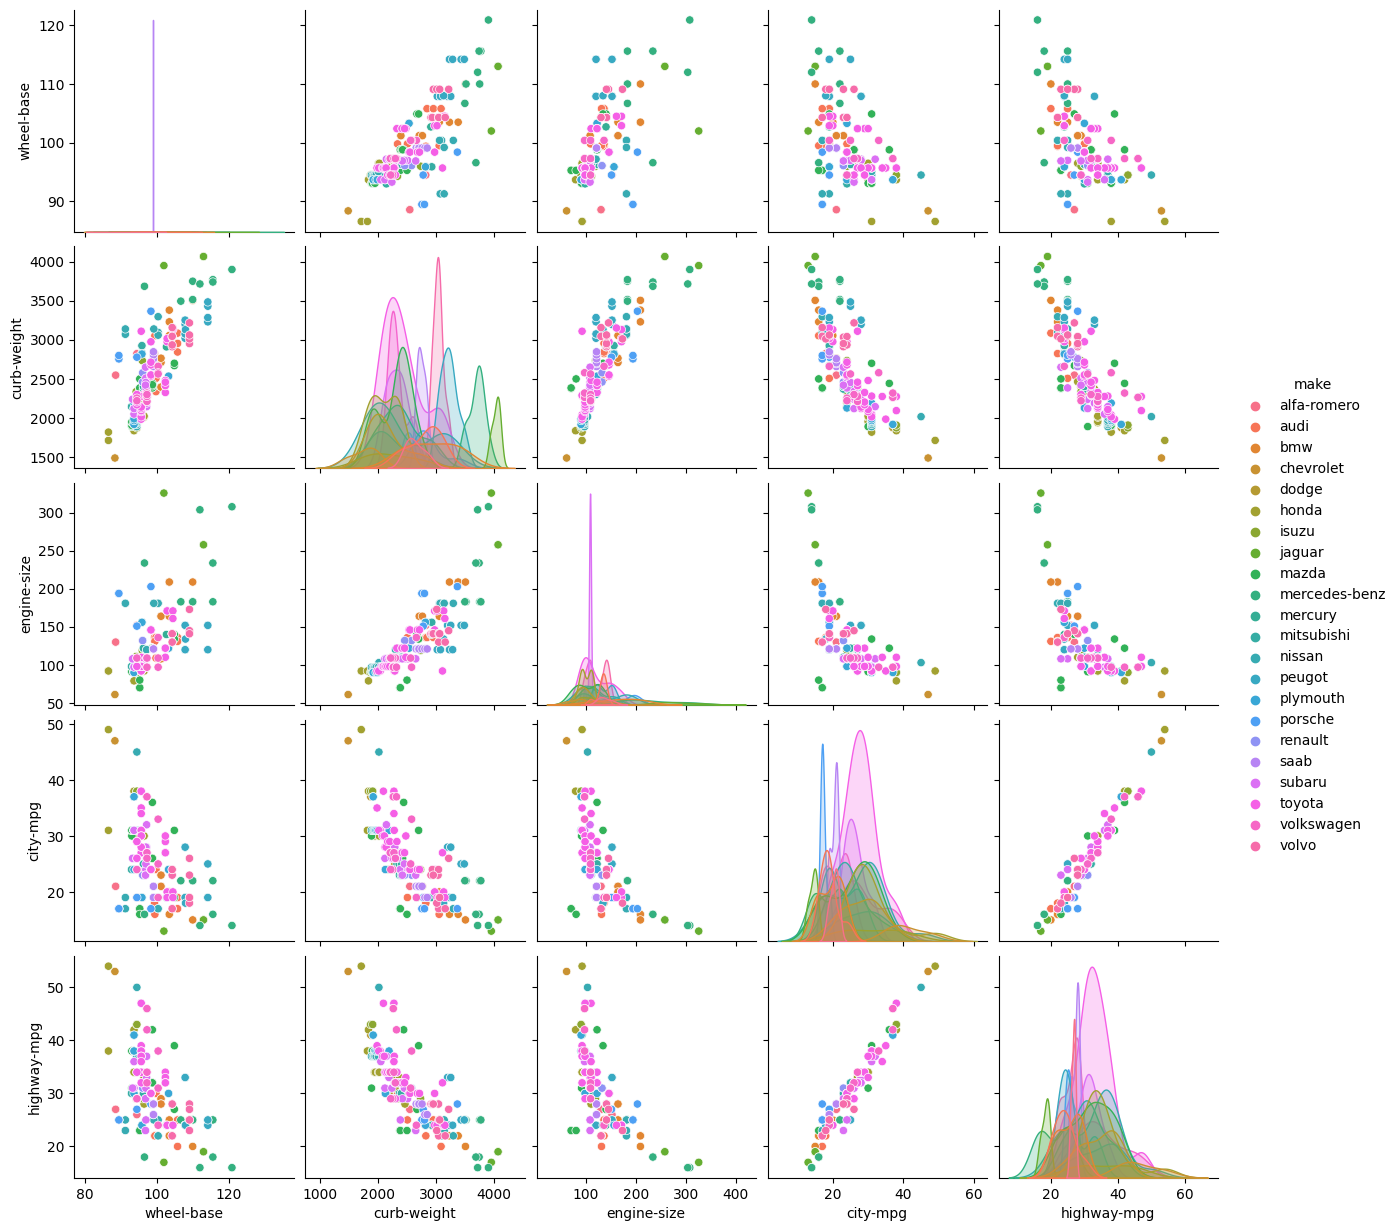

In [9]:
sns.pairplot(df_novo, hue='make')

In [10]:
x = np.array(df['curb-weight']).reshape(-1,1)

In [11]:
x

array([[2548],
       [2548],
       [2823],
       [2337],
       [2824],
       [2507],
       [2844],
       [2954],
       [3086],
       [3053],
       [2395],
       [2395],
       [2710],
       [2765],
       [3055],
       [3230],
       [3380],
       [3505],
       [1488],
       [1874],
       [1909],
       [1876],
       [1876],
       [2128],
       [1967],
       [1989],
       [1989],
       [2191],
       [2535],
       [2811],
       [1713],
       [1819],
       [1837],
       [1940],
       [1956],
       [2010],
       [2024],
       [2236],
       [2289],
       [2304],
       [2372],
       [2465],
       [2293],
       [2337],
       [1874],
       [1909],
       [2734],
       [4066],
       [4066],
       [3950],
       [1890],
       [1900],
       [1905],
       [1945],
       [1950],
       [2380],
       [2380],
       [2385],
       [2500],
       [2385],
       [2410],
       [2385],
       [2410],
       [2443],
       [2425],
       [2670],
       [27

In [12]:
y = np.array(df['city-mpg'])

In [13]:
y

array([21, 21, 19, 24, 18, 19, 19, 19, 17, 16, 23, 23, 21, 21, 20, 16, 16,
       15, 47, 38, 38, 37, 31, 24, 31, 31, 31, 24, 24, 19, 49, 31, 38, 30,
       30, 30, 30, 27, 27, 27, 27, 24, 25, 24, 38, 38, 24, 15, 15, 13, 30,
       31, 31, 31, 31, 17, 17, 17, 16, 26, 26, 26, 26, 36, 26, 19, 31, 22,
       22, 22, 22, 16, 16, 14, 14, 19, 37, 31, 31, 24, 23, 25, 19, 19, 19,
       25, 25, 23, 23, 31, 45, 31, 31, 31, 31, 31, 31, 31, 31, 27, 27, 17,
       17, 19, 19, 17, 19, 19, 28, 19, 25, 19, 28, 19, 25, 19, 28, 18, 37,
       24, 31, 31, 31, 24, 19, 19, 17, 17, 17, 17, 23, 23, 21, 21, 21, 21,
       19, 19, 31, 26, 26, 32, 28, 26, 24, 24, 28, 25, 23, 23, 35, 31, 31,
       31, 27, 27, 30, 30, 34, 38, 38, 28, 28, 29, 29, 26, 26, 24, 24, 24,
       24, 24, 24, 29, 30, 27, 27, 27, 20, 19, 20, 19, 37, 27, 37, 27, 27,
       37, 26, 24, 24, 19, 33, 25, 23, 23, 24, 24, 17, 17, 23, 19, 18, 26,
       19])

In [29]:
y

array([21, 21, 19, 24, 18, 19, 19, 19, 17, 16, 23, 23, 21, 21, 20, 16, 16,
       15, 47, 38, 38, 37, 31, 24, 31, 31, 31, 24, 24, 19, 49, 31, 38, 30,
       30, 30, 30, 27, 27, 27, 27, 24, 25, 24, 38, 38, 24, 15, 15, 13, 30,
       31, 31, 31, 31, 17, 17, 17, 16, 26, 26, 26, 26, 36, 26, 19, 31, 22,
       22, 22, 22, 16, 16, 14, 14, 19, 37, 31, 31, 24, 23, 25, 19, 19, 19,
       25, 25, 23, 23, 31, 45, 31, 31, 31, 31, 31, 31, 31, 31, 27, 27, 17,
       17, 19, 19, 17, 19, 19, 28, 19, 25, 19, 28, 19, 25, 19, 28, 18, 37,
       24, 31, 31, 31, 24, 19, 19, 17, 17, 17, 17, 23, 23, 21, 21, 21, 21,
       19, 19, 31, 26, 26, 32, 28, 26, 24, 24, 28, 25, 23, 23, 35, 31, 31,
       31, 27, 27, 30, 30, 34, 38, 38, 28, 28, 29, 29, 26, 26, 24, 24, 24,
       24, 24, 24, 29, 30, 27, 27, 27, 20, 19, 20, 19, 37, 27, 37, 27, 27,
       37, 26, 24, 24, 19, 33, 25, 23, 23, 24, 24, 17, 17, 23, 19, 18, 26,
       19])

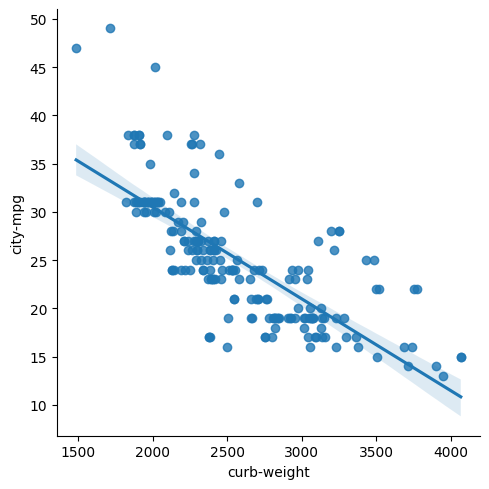

In [14]:
sns.lmplot(x='curb-weight', y = 'city-mpg', data = df_novo)

In [15]:
mdl = LinearRegression().fit(x,y)

In [16]:
mdl

LinearRegression()

In [17]:
r_sq = mdl.score(x,y)

In [18]:
r_sq

0.5736756409590965

In [21]:
print ('O coeficiente  R_SQ é {0:.2f} %'.format(r_sq*100))

O coeficiente  R_SQ é 57.37 %


In [22]:
coef = mdl.coef_

In [23]:
const = mdl.intercept_

In [25]:
coef, const

(array([-0.00951661]), 49.53982513607822)

In [31]:
print ('city-mpg = {0:.3f} + {1:.3f} * curb-weight'.format(const, coef[0]))

city-mpg = 49.540 + -0.010 * curb-weight
